### Topic 4 DQ2

Suppose you have a dataset with multiple variables that may be related to each other. How can you use Python data visualization libraries to explore potential relationships and identify patterns between variables? Provide at least two creative ideas for data visualization techniques that can be used to explore relationships between variables in a dataset.

Python has multiple tools that allow us to identify relationships between data. There are many packages that allow us to plot data such as seaborn, plotly, and matplotlib. We can leverage python to visualize the relationship between variables in a dataset. It is important to remember in any case that correlation does not equal causation, and that it takes domain knowledge and further analysis to be able to make a claim of correlation between features. Python can help us with estimating values occurring by chance, and help reduce erroneous insights.

In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
#read fetal health data
data = pd.read_csv('fetal_health.csv')

In [3]:
#convert to dataframe
df = pd.DataFrame(data)

In [4]:
#print head of data frame
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
#print info of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

<AxesSubplot:>

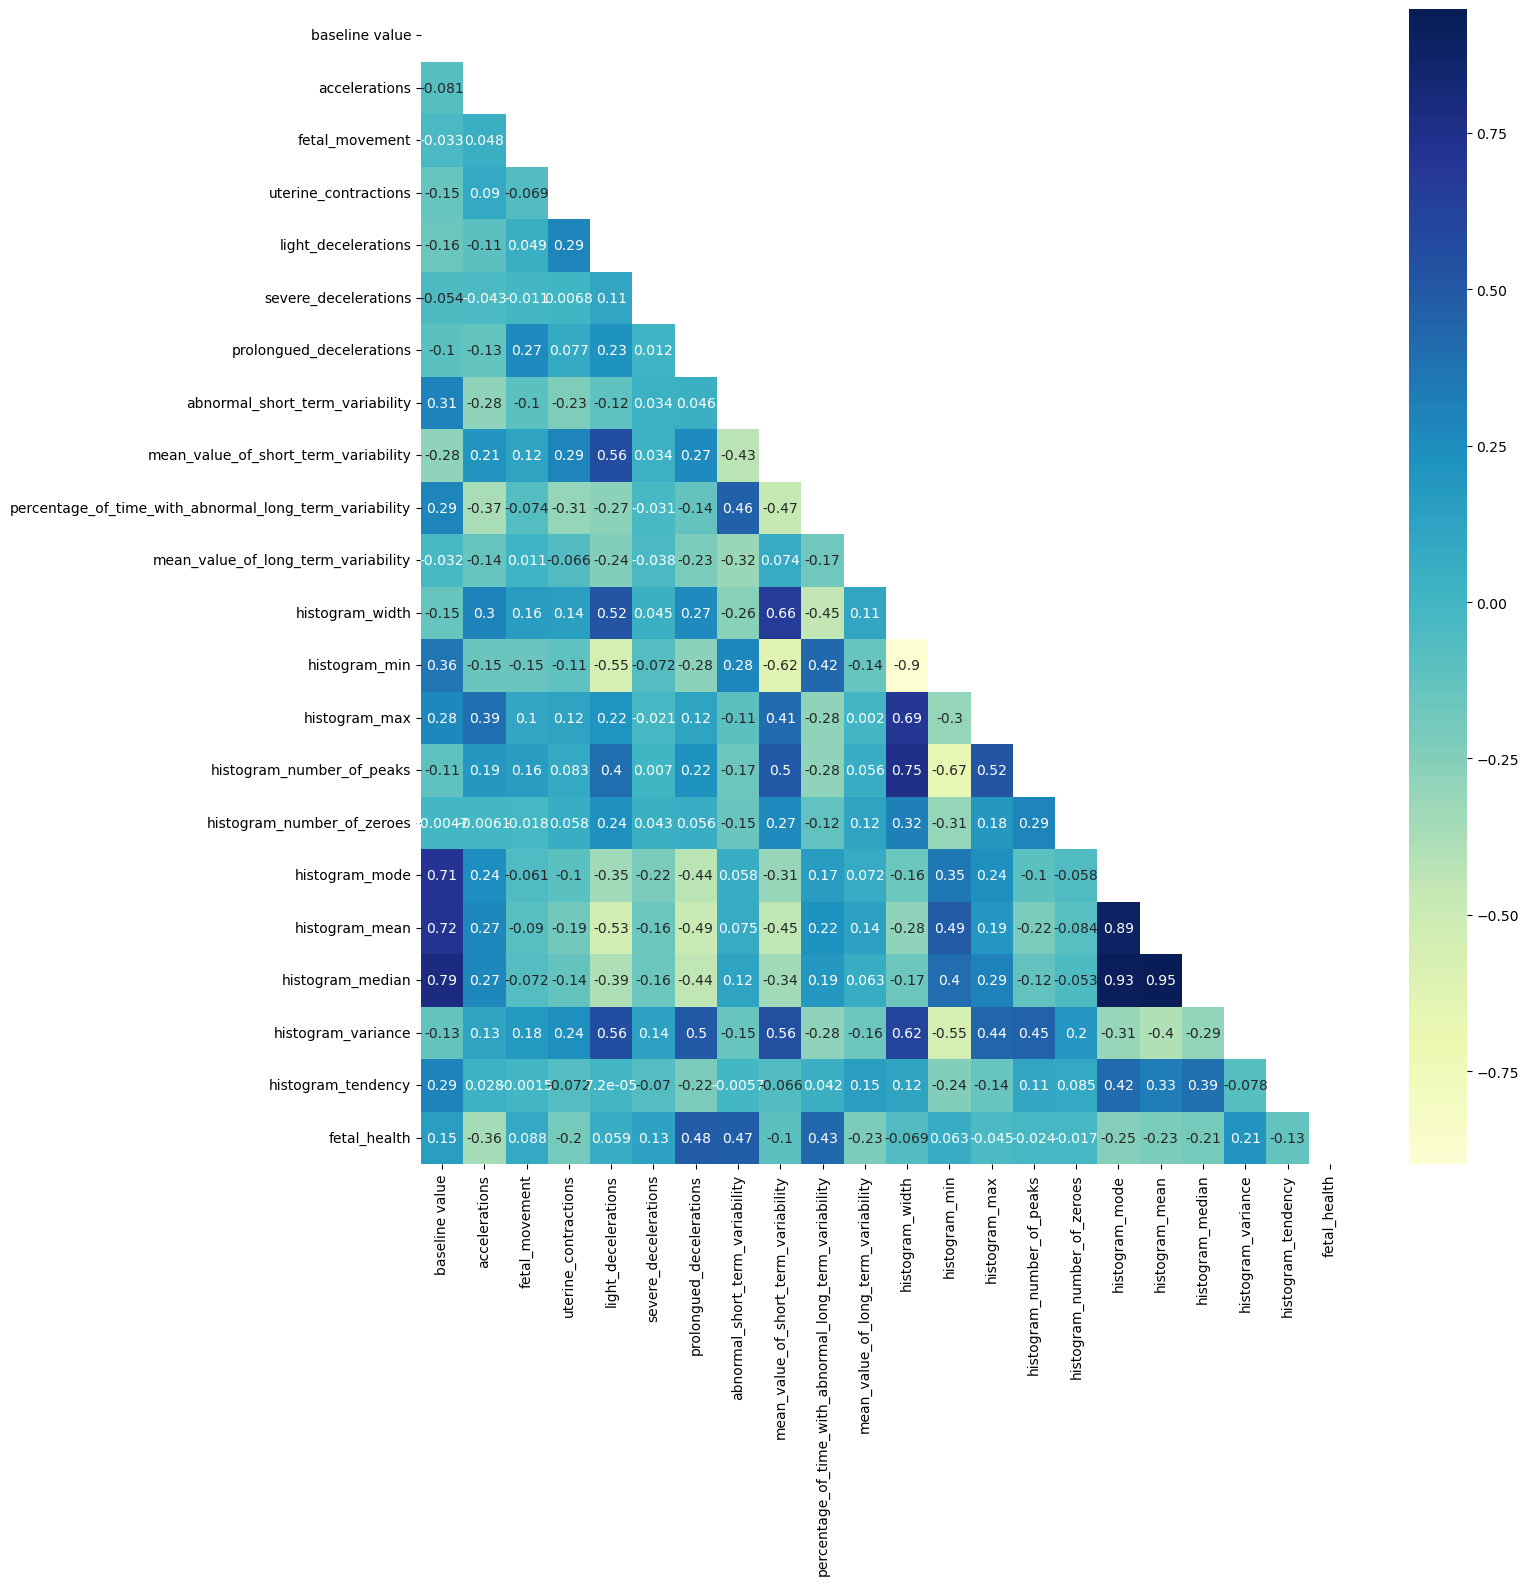

In [6]:
#use correlation matrix and heatmap to identify relational features
cmatrix= data.corr()
mask = np.triu(df.corr()) #allows us to only display lower triangle of heatmap
plt.figure(figsize=(15,15))  

sns.heatmap(cmatrix,annot=True, cmap='YlGnBu', center=0, mask=mask)

From the correlation heat map above, the three features with highest correlation to the fetal health variable are:  prolonged_decelerations, abnormal_short_term_variability, and percentage_of_time_with_abnormal_long_term_variability. We can also look more into accelerations as we can see it has the low negative correlation.
It is important to note that the classes of fetal health are: normal, suspect and pathological.

In [7]:
df['fetal_health'].unique()

array([2., 1., 3.])

In [8]:
#rename fetal health categories
cats = {1:'normal',2:'suspect',3:'pathological'}
df['fetal_health'] = df['fetal_health'].map(cats)

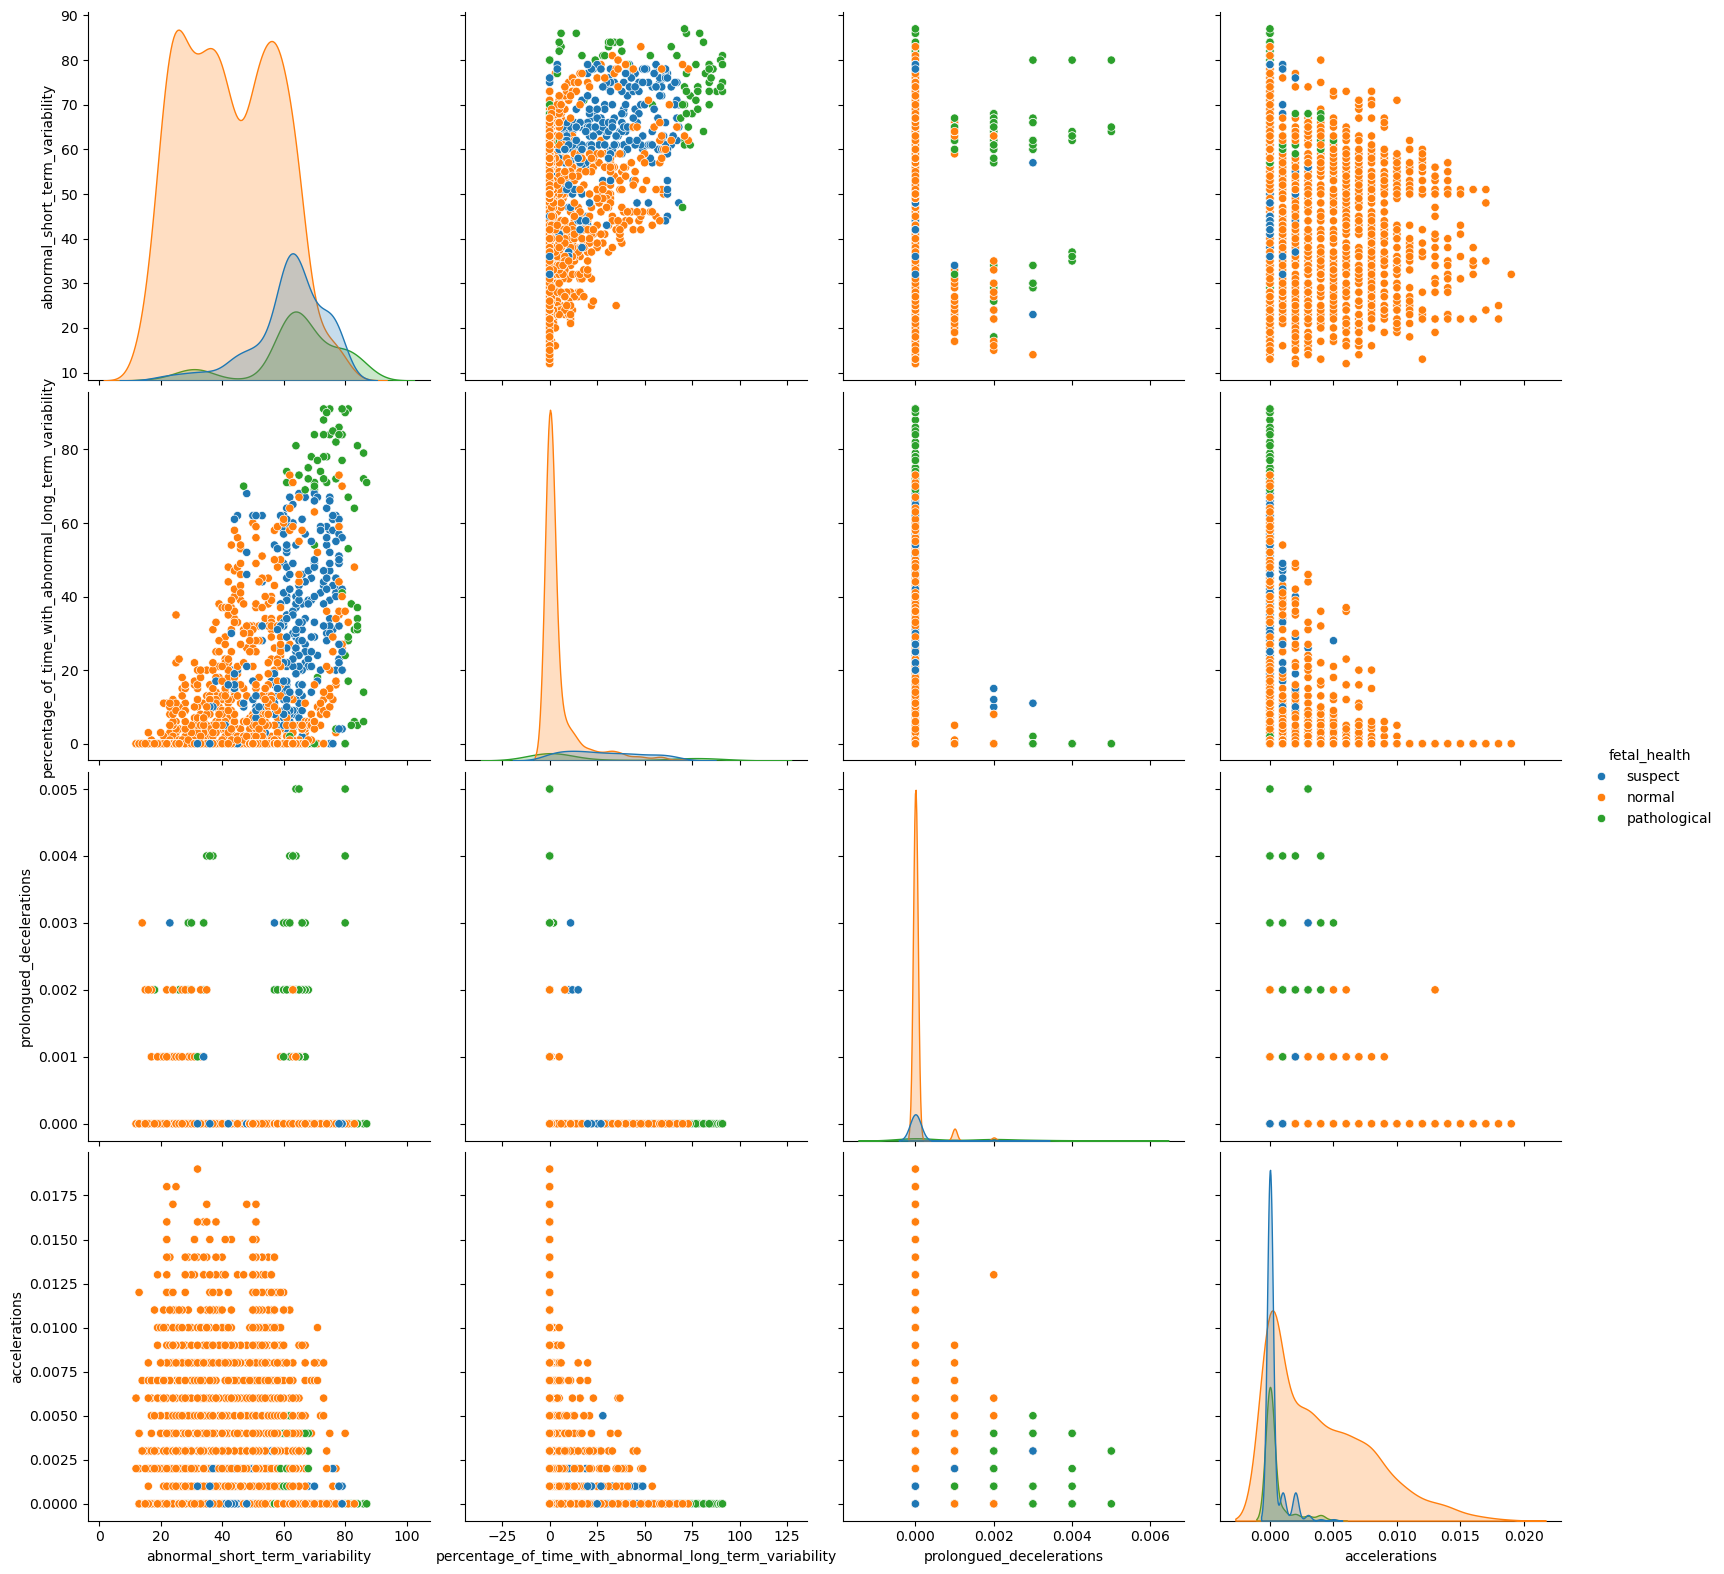

In [9]:
#pair plots of highly correlated features
sns.pairplot(data= df,vars = ['abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',
                              'prolongued_decelerations', 'accelerations'],height=4, hue='fetal_health')

From the pair plot above, it is easy to see the negative correlation for pathological and suspect fetal health cases with acceleration measures. We see that most of our samples are from normal fetuses and that could contribute to the high amount of abnormal short-term variability we see. However, if we look at the percent of time with abnormal variability we see that suspect and pathological cases have a longer time percentage being abnormal compared to normal fetuses.

In [10]:
# look closer at relationship between pathologcal fetuses and percentage time of abnormal short term variability
pd.DataFrame(df.groupby( ['fetal_health'])['percentage_of_time_with_abnormal_long_term_variability'].describe().loc[:
                                                                                                    ,['mean','std']])


,mean,std
fetal_health,,
normal,5.044713,11.526078
pathological,22.846591,33.995702
suspect,29.030508,20.265309


<AxesSubplot:title={'center':'percentage_of_time_with_abnormal_long_term_variability'}, xlabel='[fetal_health]'>

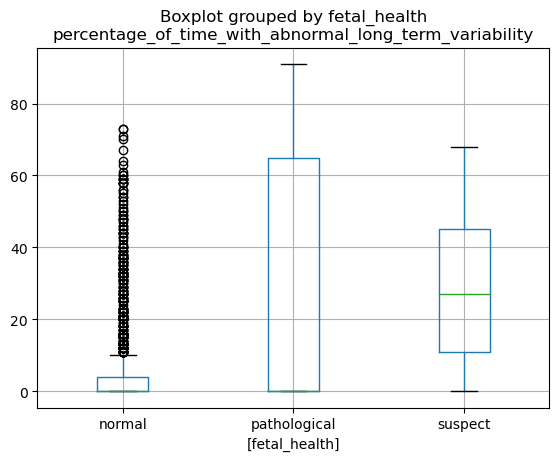

In [11]:
df.boxplot(column=['percentage_of_time_with_abnormal_long_term_variability'],by = ['fetal_health'])

By using correlation visualization tools that python has, we were able to narrow our view of a dataset with over 20 features. When asking classification questions especially, this is a crucial step in data analysis. While there are many outliers in the normal class, the mean of pathologcal and suspect classes are still much greater in the case of percentage of time with abnormal long term variability. 
Physicians as stake holders can use this insight in ordering further tests and making diagnosis.

References

GfG. (2020b, November 12). How to create a Seaborn Correlation heatmap in python?. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/ 

How to visualise correlations using pandas and Seaborn. Practical Data Science. (2021, March 7). https://practicaldatascience.co.uk/data-science/how-to-visualise-correlations-using-pandas-and-seaborn 

Koehrsen, W. (2018, April 6). Visualizing data with pairs plots in Python. Medium. https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 

Larxel. (2020, October 12). Fetal Health Classification. Kaggle. https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification 